<a href="https://colab.research.google.com/github/Meet4021/Meet-project/blob/main/Bank_Marketing_Campaign_Predictive_Analytics_meet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank = pd.read_csv("bank-additional-full.csv", sep=';')

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.drop_duplicates(keep=False, inplace=True)

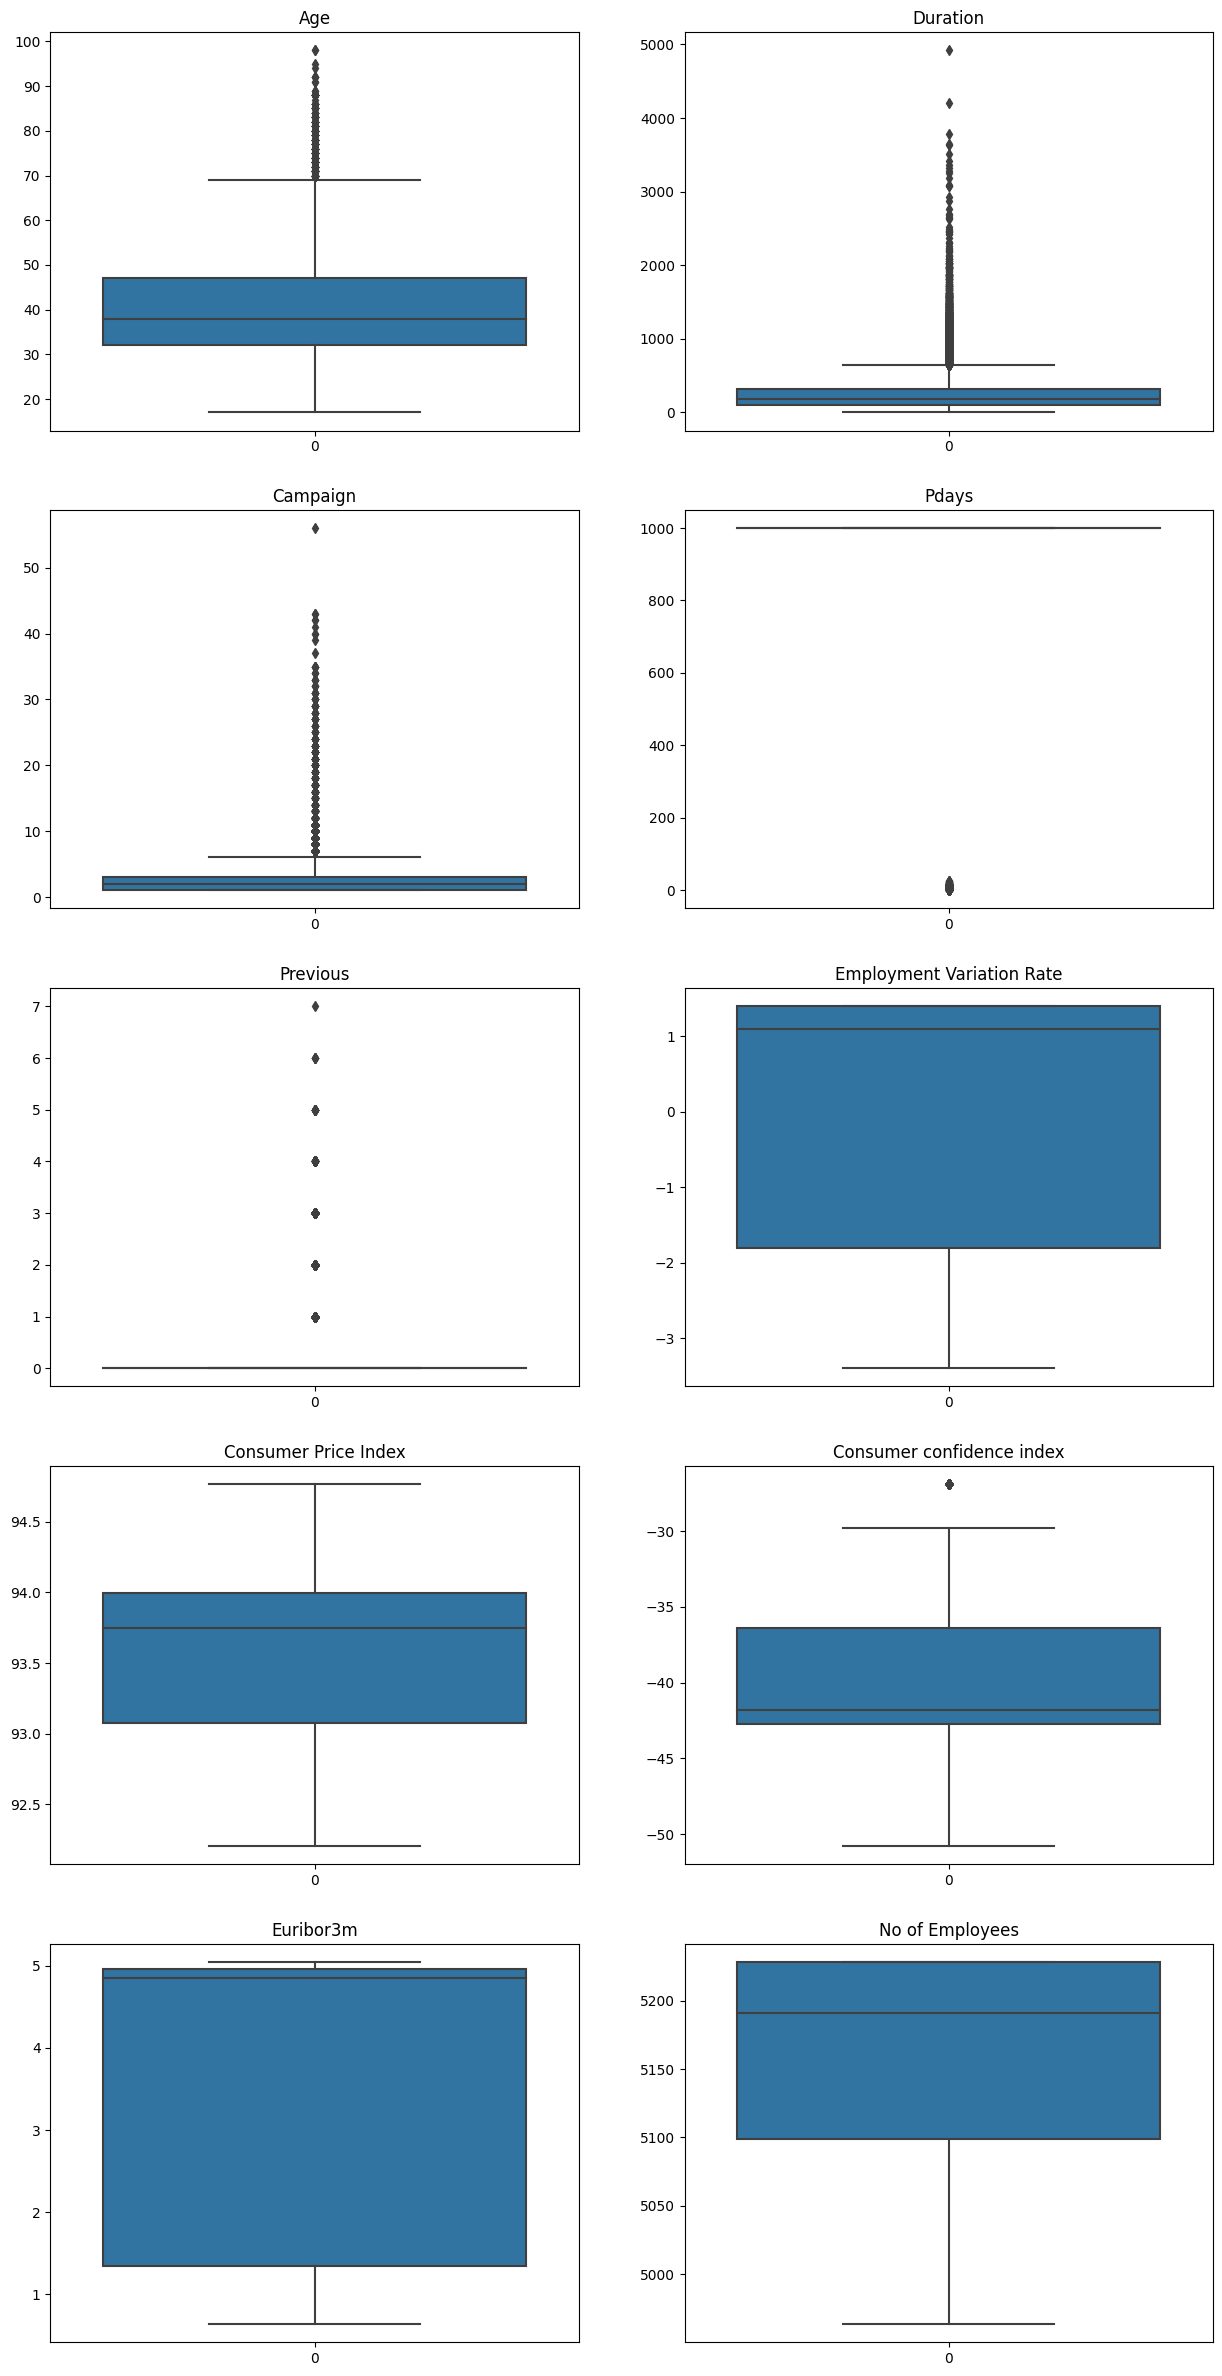

In [ ]:
plt.figure(figsize = (15, 30))

Plot1=plt.subplot(5,2,1)
sns.boxplot(bank['age'])
Plot1.set_title('Age')

Plot2=plt.subplot(5,2,2)
sns.boxplot(bank['duration'])
Plot2.set_title('Duration')

Plot3=plt.subplot(5,2,3)
sns.boxplot(bank['campaign'])
Plot3.set_title('Campaign')

Plot4=plt.subplot(5,2,4)
sns.boxplot(bank['pdays'])
Plot4.set_title('Pdays')

Plot5=plt.subplot(5,2,5)
sns.boxplot(bank['previous'])
Plot5.set_title('Previous')

Plot6=plt.subplot(5,2,6)
sns.boxplot(bank['emp.var.rate'])
Plot6.set_title('Employment Variation Rate')

Plot7=plt.subplot(5,2,7)
sns.boxplot(bank['cons.price.idx'])
Plot7.set_title('Consumer Price Index')

Plot8=plt.subplot(5,2,8)
sns.boxplot(bank['cons.conf.idx'])
Plot8.set_title('Consumer confidence index')

Plot9=plt.subplot(5,2,9)
sns.boxplot(bank['euribor3m'])
Plot9.set_title('Euribor3m')

Plot10=plt.subplot(5,2,10)
sns.boxplot(bank['nr.employed'])
Plot10.set_title('No of Employees')

plt.show()

In [ ]:
numerical_features=['age','campaign','duration','pdays','previous','cons.conf.idx']
for cols in numerical_features:
    Q1 = bank[cols].quantile(0.25)
    Q3 = bank[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (bank[cols] >= Q1 - 1.5 * IQR) & (bank[cols] <= Q3 + 1.5 *IQR)
    bank=bank.loc[filter]

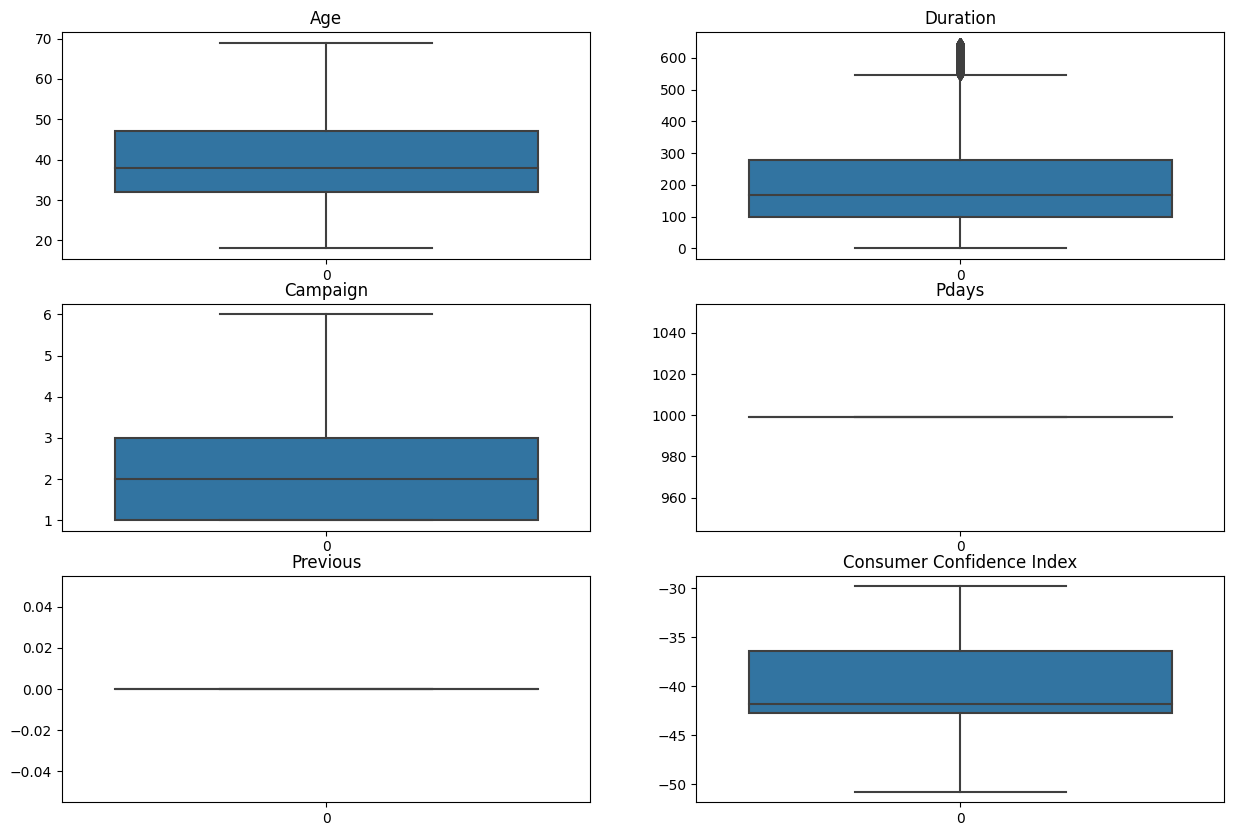

In [ ]:
plt.figure(figsize = (15, 10))

Plot1=plt.subplot(3,2,1)
sns.boxplot(bank['age'])
Plot1.set_title('Age')

Plot2=plt.subplot(3,2,2)
sns.boxplot(bank['duration'])
Plot2.set_title('Duration')

Plot3=plt.subplot(3,2,3)
sns.boxplot(bank['campaign'])
Plot3.set_title('Campaign')

Plot4=plt.subplot(3,2,4)
sns.boxplot(bank['pdays'])
Plot4.set_title('Pdays')

Plot5=plt.subplot(3,2,5)
sns.boxplot(bank['previous'])
Plot5.set_title('Previous')

Plot6=plt.subplot(3,2,6)
sns.boxplot(bank['cons.conf.idx'])
Plot6.set_title('Consumer Confidence Index')

plt.show()

In [ ]:
bank_data=bank.copy()

In [ ]:
bank_data = pd.get_dummies (bank_data, columns =["job"],drop_first = True)

In [ ]:
bank_data = pd.get_dummies (bank_data, columns =["marital"],drop_first = True)

In [ ]:
bank_data = pd.get_dummies (bank_data, columns =["education"],drop_first = True)

In [ ]:
dictionary= {'yes': 1, 'no': 0, 'unknown': -1}

bank_data["default"] = bank_data["default"].map(dictionary)
bank_data["housing"] = bank_data["housing"].map(dictionary)
bank_data["loan"] = bank_data["loan"].map(dictionary)

In [ ]:
dictionary= {'yes': 1, 'no': 0}

bank_data["y"] = bank_data["y"].map(dictionary)

In [ ]:
bank_data = pd.get_dummies (bank_data, columns =["contact"],drop_first = True)

In [ ]:
bank_data = pd.get_dummies (bank_data, columns =["poutcome"],drop_first = True)

In [ ]:
bank_data.replace({"mon":0,"thu":3,"tue":1,"wed":2,"fri":4}, inplace=True)

In [ ]:
bank_data.replace({"may" :5, "jul":7, "aug":8, "jun": 6, "nov":11,"apr":4,"mar":3,"sep":9,"oct":10,"dec":12}, inplace=True)

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 41186
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30361 non-null  int64  
 1   default                        30361 non-null  int64  
 2   housing                        30361 non-null  int64  
 3   loan                           30361 non-null  int64  
 4   month                          30361 non-null  int64  
 5   day_of_week                    30361 non-null  int64  
 6   duration                       30361 non-null  int64  
 7   campaign                       30361 non-null  int64  
 8   pdays                          30361 non-null  int64  
 9   previous                       30361 non-null  int64  
 10  emp.var.rate                   30361 non-null  float64
 11  cons.price.idx                 30361 non-null  float64
 12  cons.conf.idx                  30361 non-null 

In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
bank_scale=bank_data.copy()
Categorical_variables=['job_blue-collar','job_entrepreneur','job_housemaid','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown', 'education_basic.6y','education_basic.9y', 'education_high.school','education_illiterate','education_professional.course','education_university.degree','education_unknown', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'contact_telephone','poutcome', 'marital_married','marital_single','marital_unknown']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([bank_scale[['job_blue-collar','job_entrepreneur','job_housemaid','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown', 'education_basic.6y','education_basic.9y', 'education_high.school','education_illiterate','education_professional.course','education_university.degree','education_unknown', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'contact_telephone', 'marital_married','marital_single','marital_unknown']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_management
0,0,0,1,0,0,0,0,0,0,0,...,0.395851,-0.830399,0.0,0.0,0.501903,0.645118,0.963029,0.569846,0.149646,-0.275719
1,0,0,0,0,0,1,0,0,0,0,...,-0.400157,-0.830399,0.0,0.0,0.501903,0.645118,0.963029,0.569846,0.149646,-0.275719
2,0,0,0,0,0,1,0,0,0,0,...,0.147098,-0.830399,0.0,0.0,0.501903,0.645118,0.963029,0.569846,0.149646,-0.275719
3,0,0,0,0,0,0,0,0,0,0,...,-0.385943,-0.830399,0.0,0.0,0.501903,0.645118,0.963029,0.569846,0.149646,-0.275719
4,0,0,0,0,0,1,0,0,0,0,...,0.722783,-0.830399,0.0,0.0,0.501903,0.645118,0.963029,0.569846,0.149646,-0.275719


In [ ]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
X=scaled_data.drop(['pdays','month','cons.conf.idx','loan','housing','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (24288, 32)
Input Test: (6073, 32)
Output Training: (24288,)
Output Test: (6073,)


In [ ]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
rfc_cv=RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,rfc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Test Accuracy: 0.9180848151671762
Decision Tree Test Accuracy: 0.6539214314625548
KNN Test Accuracy: 0.9014510757313294
SVC Test Accuracy: 0.8250347492910235
Naive Bayes Test Accuracy: 0.6933153817020906


In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.040949150623804234, random_state=0)
The mean accuracy of the model is: 0.9471430923760908


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [ ]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[5673   63]
 [ 263   74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5736
           1       0.54      0.22      0.31       337

    accuracy                           0.95      6073
   macro avg       0.75      0.60      0.64      6073
weighted avg       0.93      0.95      0.94      6073



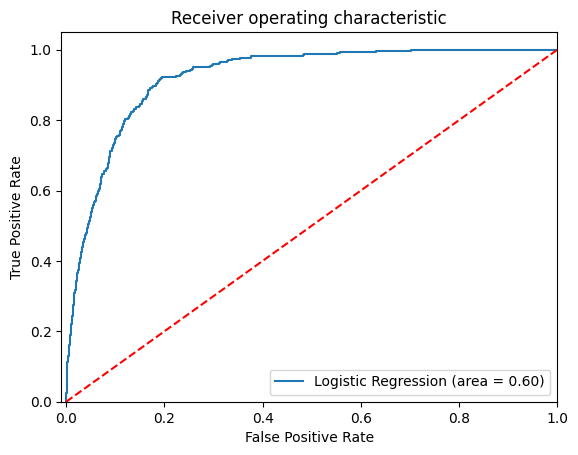

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9471430923760908
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5736
           1       0.63      0.11      0.19       337

    accuracy                           0.95      6073
   macro avg       0.79      0.55      0.58      6073
weighted avg       0.93      0.95      0.93      6073



In [ ]:
rfc = RandomForestClassifier (n_estimators = 100)
rfc.fit (X_train, y_train)

RandomForestClassifier()

In [ ]:
predict = rfc.predict (X_test)
acc = accuracy_score (predict, y_test)
pre = precision_score (predict, y_test)
rec = recall_score (predict, y_test)
f1 = f1_score (predict, y_test)

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9471430923760908
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5736
           1       0.63      0.11      0.19       337

    accuracy                           0.95      6073
   macro avg       0.79      0.55      0.58      6073
weighted avg       0.93      0.95      0.93      6073



In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

ROC_AUC Score: 0.7594778419152312


TypeError: ignored

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5896
           1       0.29      0.56      0.39       177

    accuracy                           0.95      6073
   macro avg       0.64      0.76      0.68      6073
weighted avg       0.97      0.95      0.96      6073



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
X = bank.iloc[:,0:-1]
y = bank.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

ValueError: ignored